<a href="https://colab.research.google.com/github/victoriaporter58/Computational-techniques-for-recognising-handwritten-digits/blob/master/MNIST_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MNIST Convolutional Neural Network Implementation**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [ ]:
pip freeze > requirements.txt

In [ ]:
cat requirements.txt

Import tensorflow and download the MNIST dataset using the Keras API.

In [ ]:

(rgb_train, label_train), (rgb_test, label_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


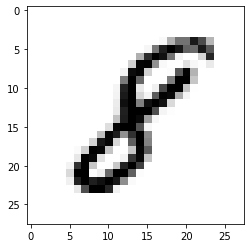

In [ ]:

%matplotlib inline
image_index = 7777
print(label_train[image_index])
plt.imshow(rgb_train[image_index], cmap='Greys')

In [ ]:
rgb_train.shape

(60000, 28, 28)

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
rgb_train = rgb_train.reshape(rgb_train.shape[0], 28, 28, 1)
rgb_test = rgb_test.reshape(rgb_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
rgb_train = rgb_train.astype('float32')
rgb_test = rgb_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
rgb_train /= 255
rgb_test /= 255
print('x_train shape:', rgb_train.shape)
print('Number of images in x_train', rgb_train.shape[0])
print('Number of images in x_test', rgb_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


#Train

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=rgb_train,y=label_train, epochs=50)

Epoch 1/60
60000/60000 [==============================] - 13s 221us/step - loss: 0.1997 - accuracy: 0.9399
Epoch 2/60
60000/60000 [==============================] - 7s 114us/step - loss: 0.0819 - accuracy: 0.9752
Epoch 3/60
60000/60000 [==============================] - 7s 114us/step - loss: 0.0590 - accuracy: 0.9818
Epoch 4/60
60000/60000 [==============================] - 7s 112us/step - loss: 0.0461 - accuracy: 0.9855
Epoch 5/60
60000/60000 [==============================] - 7s 113us/step - loss: 0.0353 - accuracy: 0.9888
Epoch 6/60
60000/60000 [==============================] - 7s 113us/step - loss: 0.0303 - accuracy: 0.9898
Epoch 7/60
60000/60000 [==============================] - 7s 112us/step - loss: 0.0268 - accuracy: 0.9908
Epoch 8/60
60000/60000 [==============================] - 7s 112us/step - loss: 0.0223 - accuracy: 0.9923
Epoch 9/60
60000/60000 [==============================] - 7s 116us/step - loss: 0.0199 - accuracy: 0.9932
Epoch 10/60
60000/60000 [====================

#Evaluate

In [ ]:
model.evaluate(rgb_test, label_test)

10000/10000 [==============================] - 1s 58us/step


[0.1624621360273489, 0.9842000007629395]

#Predict
Test the models performance by making 'image_index' equal to a number between 0 and 9999 i.e. the test dataset.

7


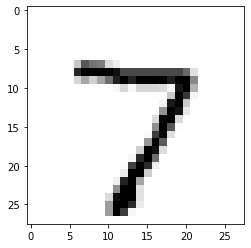

In [ ]:
image_index = 0
plt.imshow(rgb_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(rgb_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())